# Analysis of criminal activities against men and women over the years 

### Basic Initialization

In [6]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/courts-dataset/csv/judges/judges_clean.csv
/kaggle/input/courts-dataset/csv/acts/acts_sections.csv
/kaggle/input/courts-dataset/csv/cases/cases_2015.csv
/kaggle/input/courts-dataset/csv/cases/cases_2012.csv
/kaggle/input/courts-dataset/csv/cases/cases_2018.csv
/kaggle/input/courts-dataset/csv/cases/cases_2013.csv
/kaggle/input/courts-dataset/csv/cases/cases_2017.csv
/kaggle/input/courts-dataset/csv/cases/cases_2010.csv
/kaggle/input/courts-dataset/csv/cases/cases_2014.csv
/kaggle/input/courts-dataset/csv/cases/cases_2016.csv
/kaggle/input/courts-dataset/csv/cases/cases_2011.csv
/kaggle/input/courts-dataset/csv/keys/type_name_key.csv
/kaggle/input/courts-dataset/csv/keys/cases_district_key.csv
/kaggle/input/courts-dataset/csv/keys/act_key.csv
/kaggle/input/courts-dataset/csv/keys/disp_name_key.csv
/kaggle/input/courts-dataset/csv/keys/purpose_name_key.csv
/kaggle/input/courts-dataset/csv/keys/cases_state_key.csv
/kaggle/input/courts-dataset/csv/keys/section_key.csv
/kaggle

### Breaking down the data into smaller chunks according to age and gender 

In [7]:
# helpers to loop and name things properly
name = '/kaggle/input/courts-dataset/csv/cases/cases_201'
helper = 'cases_201'

# looping over all the years 
for i in range(9):
    # creating the name formatters
    year = name + str(i) + '.csv'
    help = helper + str(i)
    
    # checking if the dataset is loaded properly
    df = pd.read_csv(year)
    df.head()
    
    # creating the smaller chunks of csv files for better analysis later
    print(help)
    
    # cases where the defendant was a woman
    chunk = df.loc[(df['female_petitioner'] == '1 female')]
    print(chunk.shape)
    naming = help + '_fem_victim.csv'
    chunk.to_csv(naming)
    
    # cases where the defendant was a man
    chunk = df.loc[(df['female_petitioner'] == '0 male')]
    print(chunk.shape)
    naming = help + '_male_victim.csv'
    chunk.to_csv(naming)

cases_2010
(653521, 19)
(1630197, 19)
cases_2011
(830161, 19)
(2026651, 19)
cases_2012
(1056298, 19)
(2496341, 19)
cases_2013
(1209277, 19)
(2925391, 19)
cases_2014
(1416312, 19)
(3350066, 19)
cases_2015
(1618554, 19)
(3804863, 19)
cases_2016
(1693064, 19)
(3954945, 19)
cases_2017
(1806608, 19)
(4366629, 19)
cases_2018
(1877482, 19)
(4621349, 19)


## Number of cases

### Finding statewise and yearwise criminal cases against women

In [8]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
femcases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    femcases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_fem_victim.csv'
    
    df = pd.read_csv(file)
    femcases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        #print(temp.shape[0])
        femcases[j][i] = temp.shape[0]

print(femcases)

[[653521, 830161, 1056298, 1209277, 1416312, 1618554, 1693064, 1806608, 1877482], [115731, 120008, 142310, 145398, 164258, 171635, 171724, 182505, 189030], [35502, 46481, 52771, 51054, 66523, 73922, 76690, 83675, 83676], [96773, 116751, 145484, 169358, 190748, 193461, 199789, 189431, 190628], [28359, 33407, 44989, 59940, 78444, 94902, 99833, 108543, 101862], [4474, 8596, 12199, 13659, 17174, 19666, 18986, 20625, 28906], [6874, 13084, 16977, 18928, 23830, 25188, 25813, 28938, 30755], [6480, 8013, 10356, 12965, 17470, 22419, 22343, 26185, 36494], [26047, 30616, 42425, 57473, 75140, 78765, 74868, 79748, 104617], [24872, 34841, 44439, 45849, 50769, 82704, 74662, 87536, 84429], [34965, 44473, 54004, 64018, 74440, 88269, 82273, 91998, 91753], [10070, 12632, 16658, 21519, 23468, 26032, 28331, 28502, 26236], [1391, 3279, 4633, 4191, 4497, 6120, 6852, 12485, 16553], [76456, 115080, 161776, 180874, 211528, 255127, 308342, 335616, 357219], [16390, 29856, 38938, 46941, 57172, 62255, 65382, 62269, 

### Finding statewise and yearwise criminal cases against men

In [9]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
mencases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    mencases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_male_victim.csv'
    
    df = pd.read_csv(file)
    mencases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        #print(temp.shape[0])
        mencases[j][i] = temp.shape[0]

print(mencases)

[[1630197, 2026651, 2496341, 2925391, 3350066, 3804863, 3954945, 4366629, 4621349], [311901, 329347, 375269, 387691, 435399, 490122, 475647, 484315, 498825], [42487, 56099, 64546, 68957, 82304, 90417, 89001, 94659, 91873], [228097, 270742, 323955, 411683, 449929, 475525, 492264, 476315, 456816], [71346, 83245, 105134, 137234, 168841, 186528, 212924, 203906, 190070], [13418, 20898, 31339, 36487, 46491, 52647, 51149, 57474, 87683], [13616, 20234, 25486, 29448, 36530, 40254, 43856, 53380, 56941], [14454, 21588, 29953, 33158, 43277, 59693, 58665, 79735, 148995], [66354, 74822, 98638, 136179, 195365, 214921, 218972, 248641, 321909], [71852, 99049, 136977, 179782, 185835, 234656, 221301, 356074, 354627], [75037, 93239, 109789, 129445, 159507, 176241, 177679, 205129, 201979], [25041, 33365, 39272, 54932, 57554, 67869, 69312, 83151, 70626], [4081, 8398, 12409, 11972, 11741, 17071, 17230, 30942, 40779], [183647, 278232, 348881, 379160, 440990, 560671, 657246, 710153, 799464], [48733, 82188, 103

### Finding the total number of cases that took place for each state and year

In [10]:
name = '/kaggle/input/courts-dataset/csv/cases/cases_201'
year = 2010

# initializing the matrix 
totcases = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    totcases.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '.csv'
    
    df = pd.read_csv(file)
    totcases[0][i] = df.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j)]
        # print(temp.shape[0])
        totcases[j][i] = temp.shape[0]

print(totcases)

[[4281327, 5208653, 6400783, 7555617, 8874616, 10475876, 11349260, 13065513, 13724299], [866279, 870832, 965560, 1039581, 1114737, 1259036, 1253768, 1314965, 1374670], [119359, 158237, 180811, 195473, 246828, 269049, 273082, 309346, 317917], [507691, 627571, 724072, 896535, 1029441, 1063633, 1074358, 1100310, 1101515], [217526, 237080, 335315, 409259, 557128, 683450, 809819, 806106, 705613], [28541, 44381, 62039, 69771, 88507, 120239, 110985, 146048, 315195], [47906, 72233, 91339, 111690, 131610, 155744, 155943, 214503, 212765], [42990, 56304, 76004, 87633, 107528, 136885, 130751, 175810, 275310], [140198, 172378, 217541, 286735, 355055, 378305, 389051, 479259, 612675], [190334, 251013, 330951, 437010, 447139, 585688, 559176, 913171, 865734], [170958, 221802, 268919, 327097, 401418, 461290, 505604, 624243, 658724], [83523, 102265, 126070, 159041, 164049, 192927, 229001, 299934, 256311], [12457, 23164, 28960, 27459, 29587, 50341, 42756, 67300, 86291], [576840, 763701, 961480, 1004559, 1

## Percentage values

### Finding the % of crimes committed against women for each of the states and years

In [11]:
percentwomen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if totcases[i][j] != 0:
            percent = (femcases[i][j] / totcases[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    percentwomen.append(statewise) 

print(percentwomen)

[[15.264449550338014, 15.938112982377595, 16.502637255473278, 16.005006606343333, 15.959135584007239, 15.45029742620092, 14.917836052747052, 13.827302456474538, 13.679984675355733], [13.359552753789483, 13.78084406636412, 14.738597290691413, 13.986211752619566, 14.735134834494593, 13.632255153943177, 13.696632869877043, 13.879076629415993, 13.750936588417584], [29.743881902495833, 29.37429299089341, 29.18572431986992, 26.11818512019563, 26.951156270763448, 27.475292604692825, 28.08313986275185, 27.04900014870081, 26.320077252867886], [19.061397582387713, 18.603632098997565, 20.09247699123844, 18.89028314566637, 18.529279482748404, 18.188698545456937, 18.596129037062134, 17.216148176423008, 17.305983123243895], [13.037062236238425, 14.091024126877002, 13.416936313615555, 14.645982128676463, 14.080067776166338, 13.885726827127076, 12.327816462691047, 13.46510260437213, 14.43595852117237], [15.675694614764723, 19.368648746085036, 19.66343751511146, 19.57690157801952, 19.4041149287627, 16.

### Finding the % of crimes committed against men for each of the states and years

In [12]:
percentmen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if totcases[i][j] != 0:
            percent = (mencases[i][j] / totcases[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    percentmen.append(statewise)

print(percentmen)

[[38.076909332083254, 38.9093111021218, 39.00055665064727, 38.71809542490044, 37.74885583781879, 36.320237085662335, 34.8476023987467, 33.421029851640725, 33.67275079040467], [36.004682094336815, 37.81980910210006, 38.865425245453416, 37.293005547427285, 39.058450558293124, 38.92835470947614, 37.937401496927656, 36.83101831607685, 36.286890671943084], [35.59597516735227, 35.452517426392056, 35.698049344342984, 35.27699477677224, 33.3446772651401, 33.60614609234749, 32.59130957001926, 30.599716821940483, 28.898423173343986], [44.928312694138754, 43.14125413698211, 44.74071639284491, 45.91934503393621, 43.70614731684477, 44.707620015550475, 45.8193637502583, 43.28916396288319, 41.47160955592979], [32.79883784007429, 35.11262021258647, 31.353801649195535, 33.53231083494804, 30.30560302120877, 27.292120857414588, 26.292788882453983, 25.295184504271152, 26.93686199092137], [47.01306891839809, 47.08771771704108, 50.5149986298941, 52.29536626965358, 52.52804862892201, 43.78529428887466, 46.08

## Percentage analysis - this time without the unclear data

### Finding the new total number of cases

In [13]:
newtot = []

for i in range(34):
    statewise = []
    for j in range(9):
        temp = femcases[i][j] + mencases[i][j]
        statewise.append(temp)
    newtot.append(statewise)

print(newtot)

[[2283718, 2856812, 3552639, 4134668, 4766378, 5423417, 5648009, 6173237, 6498831], [427632, 449355, 517579, 533089, 599657, 661757, 647371, 666820, 687855], [77989, 102580, 117317, 120011, 148827, 164339, 165691, 178334, 175549], [324870, 387493, 469439, 581041, 640677, 668986, 692053, 665746, 647444], [99705, 116652, 150123, 197174, 247285, 281430, 312757, 312449, 291932], [17892, 29494, 43538, 50146, 63665, 72313, 70135, 78099, 116589], [20490, 33318, 42463, 48376, 60360, 65442, 69669, 82318, 87696], [20934, 29601, 40309, 46123, 60747, 82112, 81008, 105920, 185489], [92401, 105438, 141063, 193652, 270505, 293686, 293840, 328389, 426526], [96724, 133890, 181416, 225631, 236604, 317360, 295963, 443610, 439056], [110002, 137712, 163793, 193463, 233947, 264510, 259952, 297127, 293732], [35111, 45997, 55930, 76451, 81022, 93901, 97643, 111653, 96862], [5472, 11677, 17042, 16163, 16238, 23191, 24082, 43427, 57332], [260103, 393312, 510657, 560034, 652518, 815798, 965588, 1045769, 1156683]

### Finding the % for crimes against women

In [14]:
newpercentwomen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (femcases[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    newpercentwomen.append(statewise) 

print(newpercentwomen)

[[28.61653671775587, 29.05900003220373, 29.732770484138694, 29.247257579084945, 29.714638662733, 29.843805114008383, 29.976297842301598, 29.26516509895862, 28.88953413313871], [27.06322258390392, 26.706724082295736, 27.495319555082414, 27.274620185372424, 27.391992422334766, 25.936257568865912, 26.526365870574985, 27.36945502534417, 27.481082495584097], [45.521804357024706, 45.31195164749464, 44.9815457265358, 42.54110039913008, 44.69820664261189, 44.98141037732979, 46.28495210964989, 46.92038534435385, 47.66532421147372], [29.78822298150029, 30.129834603463806, 30.991033978855615, 29.14734072122277, 29.772880874449996, 28.918542391021635, 28.869031707109137, 28.453944897904005, 29.443164196440158], [28.44290657439446, 28.638171655865307, 29.96809283054562, 30.399545579031717, 31.722102028024345, 33.72135166826564, 31.920308738093794, 34.7394294748903, 34.89237219626488], [25.00558909009613, 29.14491082932122, 28.019201616978272, 27.238463686036773, 26.97557527683971, 27.19566329705585

### Finding the % for crimes against men

In [15]:
newpercentmen = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (mencases[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    newpercentmen.append(statewise)

print(newpercentmen)

[[71.38346328224414, 70.94099996779627, 70.2672295158613, 70.75274242091506, 70.28536133726699, 70.15619488599162, 70.0237021576984, 70.73483490104138, 71.11046586686129], [72.93677741609609, 73.29327591770426, 72.5046804449176, 72.72537981462757, 72.60800757766523, 74.06374243113409, 73.47363412942501, 72.63054497465583, 72.5189175044159], [54.478195642975294, 54.68804835250536, 55.0184542734642, 57.45889960086992, 55.30179335738811, 55.01858962267021, 53.71504789035011, 53.07961465564615, 52.33467578852628], [70.21177701849972, 69.8701653965362, 69.00896602114439, 70.85265927877722, 70.22711912555, 71.08145760897835, 71.13096829289086, 71.54605510209599, 70.55683580355985], [71.55709342560553, 71.3618283441347, 70.03190716945437, 69.60045442096828, 68.27789797197565, 66.27864833173436, 68.0796912619062, 65.2605705251097, 65.10762780373511], [74.99441090990386, 70.85508917067878, 71.98079838302172, 72.76153631396323, 73.0244247231603, 72.80433670294416, 72.92935053824766, 73.591211155

## Further analysis of crimes against men


### Criminal activities performed by men

Finding the number of cases

In [16]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
menvmen = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    menvmen.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_male_victim.csv'
    
    df = pd.read_csv(file)
    
    temp = df.loc[df['female_defendant'] == '0 male']
    menvmen[0][i] = temp.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j) & (df['female_defendant'] == '0 male')]
        #print(temp.shape[0])
        menvmen[j][i] = temp.shape[0]

print(menvmen)

[[955321, 1188884, 1449743, 1653250, 1825467, 2048905, 2057973, 2240625, 2283369], [151186, 167786, 196685, 199824, 214726, 240296, 223974, 221697, 217107], [21944, 28002, 31542, 34070, 40113, 44374, 43758, 45924, 44092], [124010, 148794, 177890, 230985, 241640, 254074, 262762, 262720, 252681], [41786, 51566, 65983, 85527, 109328, 122378, 137789, 129674, 122590], [9218, 13604, 19541, 22381, 27573, 30623, 29640, 32883, 45943], [8212, 11933, 13975, 15844, 21156, 24475, 27004, 33782, 34386], [9897, 13143, 15817, 16132, 20311, 24234, 22612, 28870, 39491], [50945, 57026, 73553, 91809, 111048, 114113, 107918, 113966, 144680], [49977, 67832, 90582, 115661, 115838, 136566, 124978, 185417, 181424], [41460, 51065, 60842, 69318, 82777, 91787, 98520, 115365, 111226], [16950, 22375, 25613, 35870, 34894, 39228, 37730, 46986, 38959], [2702, 5231, 7565, 7465, 7187, 10277, 10850, 17284, 20521], [117048, 172930, 211453, 212481, 237369, 314789, 325811, 357747, 391141], [29189, 48746, 59947, 71638, 78595,

Finding the percentage values

In [17]:
menvmenpercent = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (menvmen[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    menvmenpercent.append(statewise)

print(menvmenpercent)

[[41.831828623323894, 41.61575910490435, 40.80749549841681, 39.98507256205335, 38.29882984522, 37.77885786765059, 36.4371409464822, 36.2957877690424, 35.13507275385373], [35.35422980506604, 37.339297437438105, 38.00096217195829, 37.484172436497474, 35.808136984976414, 36.31181838650743, 34.59747192877036, 33.24690321226118, 31.562902065115466], [28.13730141430202, 27.297718853577695, 26.886129035007716, 28.38906433576922, 26.952770666612913, 27.001502990769083, 26.409400631295604, 25.751679432974083, 25.116634102159512], [38.17219195370456, 38.399145274882386, 37.89416729330115, 39.753649054025445, 37.716353170162186, 37.978971159336666, 37.96847929277093, 39.46249770933659, 39.027468012677545], [41.909633418584825, 44.20498576963961, 43.952625513745396, 43.37640865428505, 44.21133509917706, 43.48434779518885, 44.05624814152841, 41.5024532003623, 41.992655823959005], [51.520232506148, 46.12463551908863, 44.882631264642384, 44.63167550751805, 43.30951072017592, 42.3478489344931, 42.2613

### Criminal activities performed by women

In [18]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
menvwomen = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    menvwomen.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_male_victim.csv'
    
    df = pd.read_csv(file)
    
    temp = df.loc[df['female_defendant'] == '1 female']
    menvwomen[0][i] = temp.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j) & (df['female_defendant'] == '1 female')]
        #print(temp.shape[0])
        menvwomen[j][i] = temp.shape[0]

print(menvwomen)

[[242914, 305735, 385646, 445218, 494089, 537579, 572268, 610266, 630834], [40028, 39265, 46964, 46807, 52160, 52740, 54779, 55750, 55888], [13043, 17113, 19900, 21714, 26173, 29112, 28027, 30780, 30184], [32582, 37721, 43169, 52488, 57874, 59817, 61264, 64269, 63616], [11571, 12598, 16675, 21990, 24919, 26162, 29419, 28580, 25556], [1778, 2990, 4163, 4578, 5638, 6348, 6139, 7113, 10070], [1883, 3140, 4105, 4669, 5780, 6067, 6337, 7930, 8572], [2031, 2429, 3566, 4207, 5324, 6063, 6396, 8138, 12282], [6481, 8120, 11608, 16070, 19546, 18354, 19163, 20748, 25446], [7079, 9980, 13859, 15545, 15409, 25627, 22012, 24209, 23900], [14959, 18610, 21857, 26310, 30594, 33760, 35529, 42190, 42707], [4309, 6093, 7134, 9202, 10071, 11294, 11508, 13610, 11974], [544, 1206, 1754, 1881, 1681, 2316, 2494, 4682, 5996], [32337, 49151, 65222, 75820, 82529, 90222, 112137, 114049, 122333], [5856, 11539, 15688, 19028, 20778, 21013, 20384, 21209, 22530], [1149, 1559, 2008, 3185, 3739, 3930, 3884, 4108, 4473], 

In [20]:
menvwomenpercent = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (menvwomen[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    menvwomenpercent.append(statewise)

print(menvwomenpercent)

[[10.636777395457758, 10.701964287464488, 10.855198065438115, 10.767926227692284, 10.366131263613587, 9.912182670076817, 10.132207650518971, 9.88567262199718, 9.70688420732898], [9.360384629775135, 8.738080137085378, 9.073783905452116, 8.780334990967738, 8.698305864852742, 7.96969280264508, 8.46176303850497, 8.360577067274527, 8.124968198239454], [16.724153406249602, 16.682589198674204, 16.962588542155014, 18.093341443700993, 17.5861906777668, 17.714602133394994, 16.91522170787792, 17.259748561687623, 17.19405977818159], [10.029242466217255, 9.734627464238063, 9.195869963935676, 9.033441702048565, 9.033257007821414, 8.941442720774425, 8.85250118126791, 9.65368173447531, 9.825714656402717], [11.605235444561457, 10.799643383739669, 11.107558468722315, 11.152586040755882, 10.077036617667872, 9.296094943680488, 9.406344222511406, 9.147092805545864, 8.754093419015387], [9.937402190923319, 10.13765511629484, 9.56176213882126, 9.12934232042436, 8.855729207570878, 8.77850455658042, 8.753118984

## Further analysis of crimes against women

### Criminal activities performed by men

In [21]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
womenvmen = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    womenvmen.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_fem_victim.csv'
    
    df = pd.read_csv(file)
    
    temp = df.loc[df['female_defendant'] == '0 male']
    womenvmen[0][i] = temp.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j) & (df['female_defendant'] == '0 male')]
        #print(temp.shape[0])
        womenvmen[j][i] = temp.shape[0]

print(womenvmen)

[[425102, 543607, 701600, 804846, 934868, 1069350, 1119099, 1189991, 1234006], [76925, 79636, 96014, 97975, 108897, 108852, 108211, 114075, 113915], [15838, 19925, 21945, 21704, 27824, 30816, 31652, 34436, 35159], [48984, 58677, 73950, 87959, 95153, 95756, 97988, 93242, 93258], [17077, 20127, 28153, 39149, 53039, 65483, 68609, 75795, 71568], [3448, 6605, 9289, 10111, 12520, 14323, 13861, 14801, 20324], [4127, 8803, 11240, 12750, 16665, 17429, 18185, 20604, 21820], [5132, 6160, 7688, 9762, 13059, 16226, 16471, 18378, 22181], [21655, 25471, 35282, 47152, 59088, 60909, 55843, 59218, 76795], [18522, 26591, 32554, 31461, 34596, 59233, 52335, 57564, 55866], [19433, 24951, 30420, 36293, 41730, 49665, 48371, 55263, 54855], [6584, 7999, 10640, 13659, 14337, 15644, 16783, 16791, 15580], [1015, 2574, 3716, 3341, 3552, 4833, 5552, 10072, 13274], [58132, 87064, 124659, 139771, 162218, 194700, 235241, 255114, 270841], [11721, 22144, 29286, 34943, 41520, 44952, 46416, 44399, 47667], [2691, 2937, 4226

In [22]:
womenvmenpercent = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (womenvmen[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    womenvmenpercent.append(statewise)

print(womenvmenpercent)

[[18.61446991265997, 19.028448494335645, 19.74869948790181, 19.465795077137997, 19.613803185563544, 19.7172741834161, 19.814044205666104, 19.276612901788802, 18.988122633132022], [17.98859767276537, 17.72229083909159, 18.550598072951182, 18.378732256715107, 18.15988139886635, 16.448938205413768, 16.715453735184308, 17.10731531747698, 16.560903097309755], [20.30799215273949, 19.42386430103334, 18.705728922492053, 18.085008874186535, 18.695532396675336, 18.75148321457475, 19.103029132541902, 19.309834355759417, 20.028026363009758], [15.078031212484994, 15.142725158906096, 15.752845417615493, 15.138174414542174, 14.85194567621438, 14.31360297524911, 14.159031172468003, 14.005641791313806, 14.404025676351932], [17.127526202296774, 17.25388334533484, 18.753288969711505, 19.85505188310832, 21.448531047172292, 23.267952954553532, 21.936839143488395, 24.258358964182953, 24.515298083115248], [19.27118265146434, 22.394385298704822, 21.335385180761634, 20.163123678857737, 19.66543626796513, 19.80

### Criminal activities perfomed by women

In [23]:
name = '/kaggle/working/cases_201'
year = 2010

# initializing the matrix 
womenvwomen = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    womenvwomen.append(temp)

for i in range(9):
    # loading up files for each year
    workyear = year + i
    file = name + str(i) + '_fem_victim.csv'
    
    df = pd.read_csv(file)
    
    temp = df.loc[df['female_defendant'] == '1 female']
    womenvwomen[0][i] = temp.shape[0]
    
    for j in range(1, 34):
        temp = df.loc[(df['state_code'] == j) & (df['female_defendant'] == '1 female')]
        #print(temp.shape[0])
        womenvwomen[j][i] = temp.shape[0]

print(womenvwomen)

[[93974, 118658, 144639, 158723, 182507, 202959, 206389, 221565, 225678], [10120, 10795, 13018, 12496, 13337, 13163, 12768, 14219, 14965], [13380, 17257, 19667, 19025, 25290, 28708, 30201, 33122, 32158], [17708, 21324, 25642, 28508, 31953, 31791, 31134, 31972, 33377], [4738, 5673, 7566, 9225, 11131, 12707, 12915, 13048, 12269], [467, 789, 1071, 1208, 1405, 1594, 1518, 1687, 2232], [769, 1267, 1614, 1792, 2114, 2341, 2390, 2746, 2782], [650, 785, 1049, 1203, 1415, 1910, 1689, 2137, 3367], [2372, 2999, 4047, 5286, 6736, 6940, 6851, 6447, 8663], [2562, 2920, 4027, 4469, 4572, 7214, 6215, 6408, 6020], [6630, 8540, 9703, 10869, 12309, 13617, 12883, 15248, 15058], [2007, 2590, 3367, 4215, 4562, 4643, 4941, 5275, 4876], [122, 199, 330, 340, 326, 471, 539, 1005, 1189], [8891, 12848, 16218, 17339, 19657, 23526, 25935, 28810, 29838], [1439, 2408, 3213, 3506, 4158, 3969, 4209, 4101, 4555], [371, 476, 665, 853, 1131, 1323, 1296, 1208, 1757], [2850, 3307, 4066, 4258, 4800, 7008, 6589, 7523, 7371], 

In [24]:
womenvwomenpercent = []

for i in range(34):
    statewise = []
    for j in range(9):
        if newtot[i][j] != 0:
            percent = (womenvwomen[i][j] / newtot[i][j]) * 100
        else:
            percent = 0
        statewise.append(percent)
    womenvwomenpercent.append(statewise)

print(womenvwomenpercent)

[[4.11495640004589, 4.153510976571087, 4.071311495482654, 3.8388330090831957, 3.8290500669481102, 3.7422717080394152, 3.6541903527420017, 3.5891218820855246, 3.4725937634014485], [2.366520746810342, 2.4023322317544036, 2.5151715969929227, 2.3440738788457463, 2.224104779899176, 1.989098717505066, 1.9722848258571977, 2.132359557301821, 2.175603870001672], [17.156265627203837, 16.822967440046792, 16.76398134967652, 15.852713501262382, 16.99288435566127, 17.468768825415758, 18.22730262959364, 18.573014680318952, 18.31853214771944], [5.450795702896543, 5.503067152180813, 5.462264532772096, 4.90636633215212, 4.987380536526206, 4.752117383622378, 4.498788387594592, 4.802432158811318, 5.155194889442176], [4.7520184544406, 4.863182800123444, 5.0398673088067785, 4.678608741517644, 4.501283943627798, 4.515154745407384, 4.129403978168354, 4.176041529977692, 4.202691037638902], [2.610105074893807, 2.6751203634637553, 2.4599200698240615, 2.408965819806166, 2.206864054032828, 2.2043062796454302, 2.16

# Plot


In [25]:
import seaborn as sns
import matplotlib

In [26]:
year = 2010
years = []

for i in range(9):
    years.append(str(year))
    year = year + 1

print(years)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [27]:
data = {'Men' : newpercentmen[0], 'Women' : newpercentwomen[0], 'MVM' : menvmenpercent[0], 'MVW' : menvwomenpercent[0], 'WVM' : womenvmenpercent[0], 'WVW' : womenvwomenpercent[0]}
df = pd.DataFrame(data, columns = ['Men', 'Women', 'MVM', 'MVW', 'WVM', 'WVW'])

In [28]:
df

,Men,Women,MVM,MVW,WVM,WVW
0,71.383463,28.616537,41.831829,10.636777,18.614470,4.114956
1,70.941000,29.059000,41.615759,10.701964,19.028448,4.153511
2,70.267230,29.732770,40.807495,10.855198,19.748699,4.071311
3,70.752742,29.247258,39.985073,10.767926,19.465795,3.838833
4,70.285361,29.714639,38.298830,10.366131,19.613803,3.829050
5,70.156195,29.843805,37.778858,9.912183,19.717274,3.742272
6,70.023702,29.976298,36.437141,10.132208,19.814044,3.654190
7,70.734835,29.265165,36.295788,9.885673,19.276613,3.589122
8,71.110466,28.889534,35.135073,9.706884,18.988123,3.472594


In [29]:
df['Year'] = years

In [30]:
df

,Men,Women,MVM,MVW,WVM,WVW,Year
0,71.383463,28.616537,41.831829,10.636777,18.614470,4.114956,2010
1,70.941000,29.059000,41.615759,10.701964,19.028448,4.153511,2011
2,70.267230,29.732770,40.807495,10.855198,19.748699,4.071311,2012
3,70.752742,29.247258,39.985073,10.767926,19.465795,3.838833,2013
4,70.285361,29.714639,38.298830,10.366131,19.613803,3.829050,2014
5,70.156195,29.843805,37.778858,9.912183,19.717274,3.742272,2015
6,70.023702,29.976298,36.437141,10.132208,19.814044,3.654190,2016
7,70.734835,29.265165,36.295788,9.885673,19.276613,3.589122,2017
8,71.110466,28.889534,35.135073,9.706884,18.988123,3.472594,2018


<AxesSubplot:>

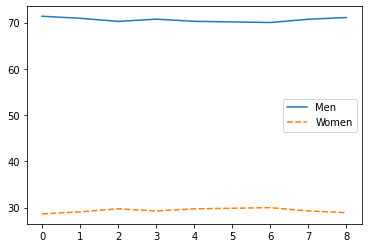

In [31]:
sns.lineplot(data=df[['Men','Women']])

The crimes committed against men and women over the years

<AxesSubplot:>

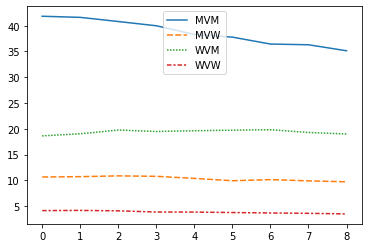

In [32]:
sns.lineplot(data=df[['MVM','MVW','WVM','WVW']])

The crimes committed by Men against Men (MVM), Men against Women (WVM), Women agaist Men (MVM) and Women against Women (WVW)